In [25]:
import warnings
warnings.filterwarnings("ignore")

# Correlation Analysis

Positive Correlation: both variables change in the same direction.   
Neutral Correlation: No relationship in the change of the variables.   
Negative Correlation: variables change in opposite directions.    

Ho: ρ = 0 There is no correlation between datas.    
H1: ρ!=0 There is correlation between datas.

## Assumptions 
1. Normal      
1. If Normal, Pearson Correlation Coefficient   
1. Unless Normal, Spearman Correlation Coefficient   

### REAL CASE:
Are there any correlation between tips and total_bill?   

#### Step 1:   
Ho: ρ = 0 There is no correlation between tips and total_bill.        
H1: ρ!=0 There is between tips and total_bill.

#### Step2: Arrange Data Sets

In [26]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
df["total_bill"] = df["total_bill"] - df["tip"]
# In the description of the dataset, it is stated that the tip is included in the total_bill. That's why it is removed because it is wanted to find only the main total_bill.

In [28]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


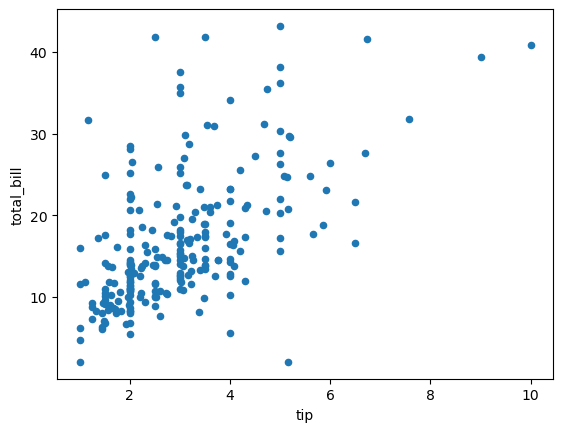

In [29]:
df.plot.scatter("tip","total_bill");

According to chart, when total bill is increased , tips are increased.

#### Step 3: Assumptions

#### Normal

In [30]:
from scipy.stats import shapiro

In [31]:
test, pvalue = shapiro(df["tip"])
print('Test = %.4f, p-değeri = %.4f' % (test, pvalue))

test, pvalue = shapiro(df["total_bill"])
print('Test = %.4f, p-değeri = %.4f' % (test, pvalue))

Test = 0.8978, p-değeri = 0.0000
Test = 0.9136, p-değeri = 0.0000


Assumption of normal is not provided. Because P values are lower than alpha. Thefore, it should be continued with Nonparametric Hypothesis Testing.

#### Step 4: Hypothesis Testing

#### Correlation Coefficient

In [32]:
df["tip"].corr(df["total_bill"])
#Pearson Correlation Coefficient

0.5766634471096374

In [33]:
df["tip"].corr(df["total_bill"], method = "spearman")
#Spearman Correlation Coefficient

0.593691939408997

Spearman Correlation Coefficient will be used because assumption of normal is not provided.    

0.48 means that there is possitive relation between tips and total_bill.    
So is this relationship significant?     

#### Testing the Significance of the Correlation

In [34]:
from scipy.stats.stats import pearsonr

In [35]:
test, pvalue = pearsonr(df["tip"],df["total_bill"])

print('Correlation Coefficient  = %.4f, p-Value = %.4f' % (test, pvalue))

Correlation Coefficient  = 0.5767, p-Value = 0.0000


Ho is rejected because P value< Alpha. This means that there is a significant relationship between tips and total_bill.

#### Nonparametric Hypothesis Testing

In [36]:
from scipy.stats import stats

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [37]:
test, pvalue = stats.spearmanr(df["tip"],df["total_bill"])

print('Correlation Coefficient = %.4f, p-Value = %.4f' % (test, pvalue))

Correlation Coefficient = 0.5937, p-değeri = 0.0000


P< Alpha. This means that there is significant relationship.